In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk, pickle as pkl

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
data_dict = pkl.load(open("/content/eda.pkl","+rb"))

In [7]:
df = pd.DataFrame.from_dict(data_dict, orient='index', columns=['description'])

In [8]:
df.head()

,description
JRASERVER-6146,97784 {panel:bgColor=#e7f4fa}\n *NOTE:* Th...
SERVER-49544,"Currently, the config server [sends setFCV to ..."
JRASERVER-31706,78055 {panel:bgColor=#e7f4fa}\n *NOTE:* Th...
CONFCLOUD-60202,"202916 {code}\n ""blueprints"": [\n ..."
JRASERVER-10310,94391 When someone goes to add watchers to ...


In [9]:
df["word_count"] = df["description"].apply(lambda x: len(x.split()))

In [12]:
df['mean_word_length'] = df['description'].map(lambda rev: np.mean([len(word) for word in rev.split()]))

In [15]:
df['mean_sent_length'] = df['description'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))

In [16]:
df.head()

,description,word_count,mean_word_length,mean_sent_length
JRASERVER-6146,97784 {panel:bgColor=#e7f4fa}\n *NOTE:* Th...,9,8.777778,91.00
SERVER-49544,"Currently, the config server [sends setFCV to ...",107,8.598131,255.75
JRASERVER-31706,78055 {panel:bgColor=#e7f4fa}\n *NOTE:* Th...,10,7.800000,91.00
CONFCLOUD-60202,"202916 {code}\n ""blueprints"": [\n ...",9,7.000000,92.00
JRASERVER-10310,94391 When someone goes to add watchers to ...,15,4.933333,91.00


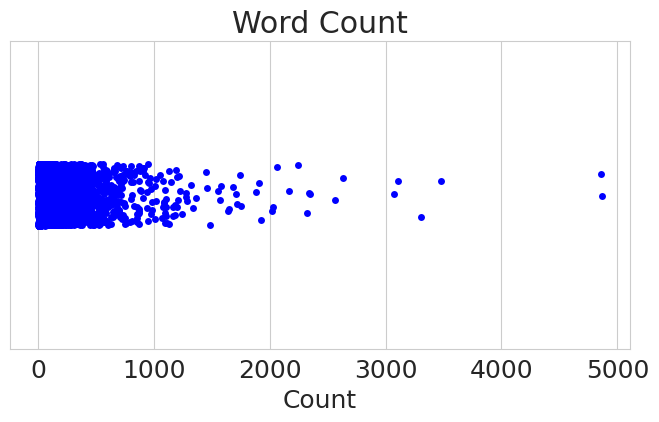

In [26]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create a strip plot for word_count
plt.figure(figsize=(8, 4))
sns.stripplot(x='word_count', data=df, jitter=True, color='blue')
plt.xlabel('Count')
plt.ylabel('')
plt.title('Word Count')
plt.show()


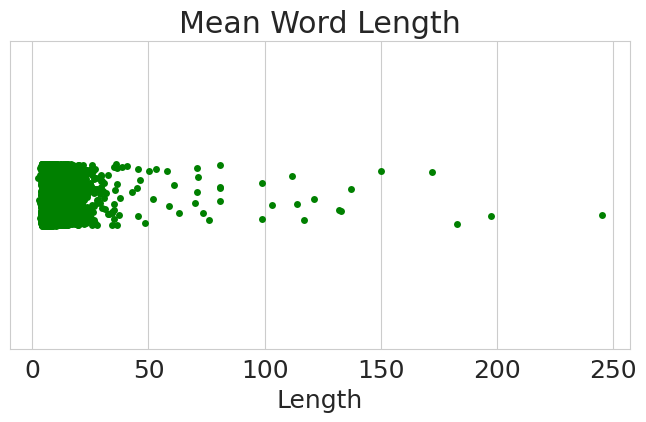

In [27]:
# Create a strip plot for mean_word_length
plt.figure(figsize=(8, 4))
sns.stripplot(x='mean_word_length', data=df, jitter=True, color='green')
plt.xlabel('Length')
plt.ylabel('')
plt.title('Mean Word Length')
plt.show()

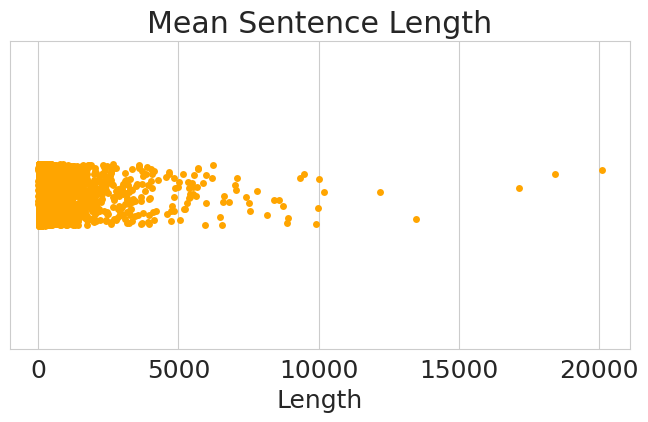

In [28]:
# Create a strip plot for mean_sent_length
plt.figure(figsize=(8, 4))
sns.stripplot(x='mean_sent_length', data=df, jitter=True, color='orange')
plt.xlabel('Length')
plt.ylabel('')
plt.title('Mean Sentence Length')
plt.show()

In [20]:
import plotly.express as px

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
def clean(review):

    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])

    return review

In [37]:
df['description'] = df['description'].apply(clean)

In [38]:
df['description_lists'] = df['description'].apply(lambda x: x.split())

In [39]:
corpus = []
for i in range(df.shape[0]):
    corpus += df['description_lists'][i]

In [40]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('object', 34662),
 ('description', 34611),
 ('dtype', 34402),
 ('note', 9786),
 ('panelbgcolore7f4fan', 9286),
 ('suggesname', 6676),
 ('name', 4956),
 ('1', 3785),
 ('3', 3734),
 ('b', 3670)]

In [41]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

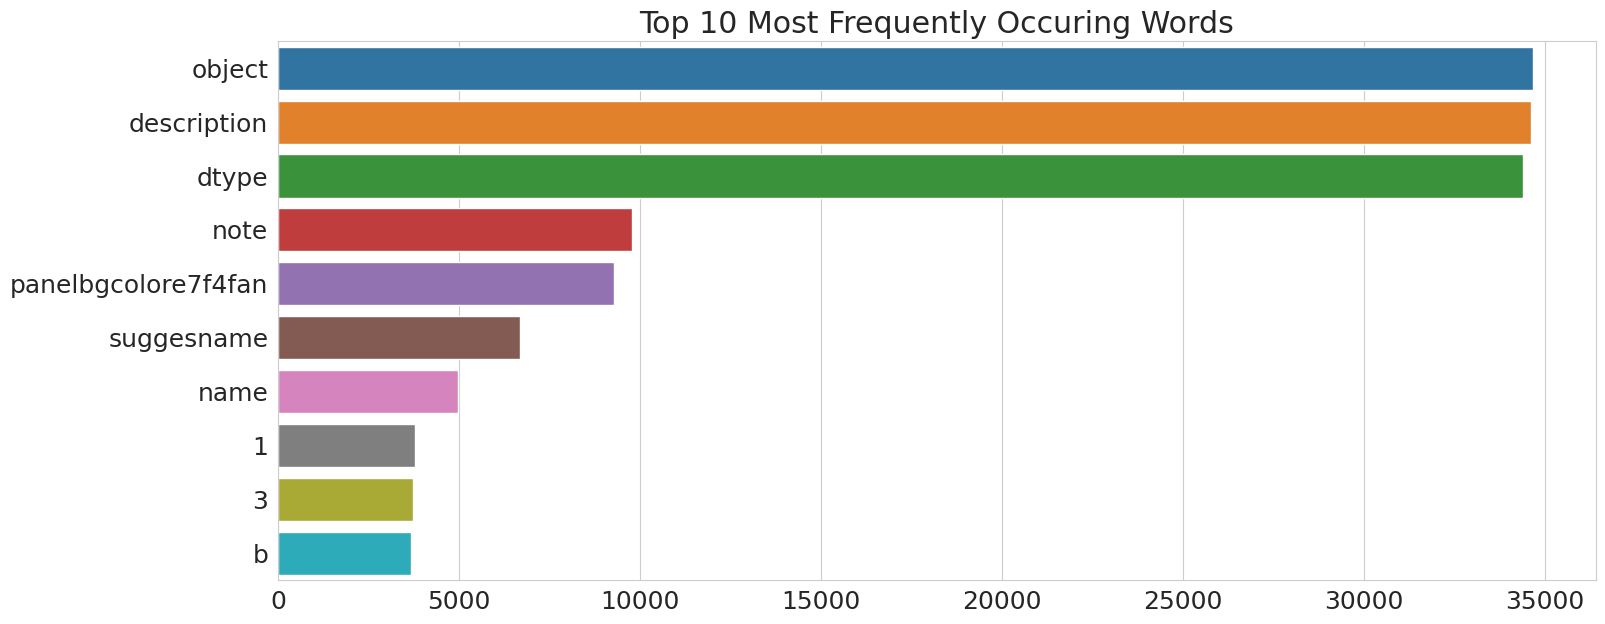

In [42]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [44]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['description'])

In [45]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

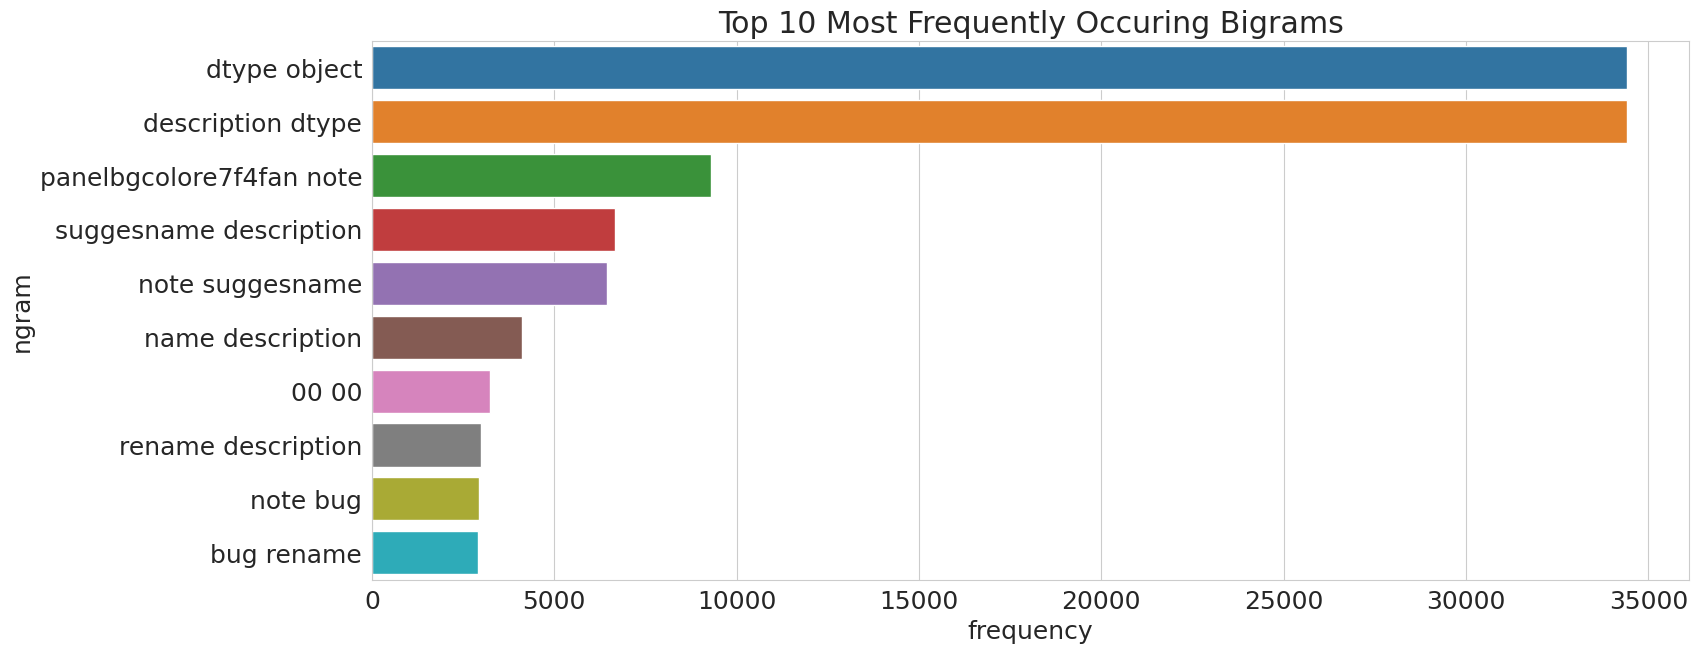

In [46]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()